
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">


## <span style="color:red"> Taller 4_3 </span> 


Using Transfer learning



*   Jhoan Manuel Diaz Higuera
*   2141846



In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import keras
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## <span style="color:green"> If you are in colaboratoy </span>: 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/cv-uis-student/notebooks
/content/drive/My Drive/cv-uis-student/notebooks


1. Carge la red Inception V3 y Otra red de su preferencia con los pesos de imagenet

In [24]:
model_insep = keras.applications.InceptionV3(weights='imagenet',  input_shape = (224,224,3), include_top = False)
model_vgg16 = keras.applications.VGG16(weights='imagenet')

ERROR! Session/line number was not unique in database. History logging moved to new session 63
87916544/87910968 [==============================] - 5s 0us/step


## <span style="color:orange">Student Challenge</span>: 

Vamos a probar otro dominio, diferente al de imagenes naturales (1000) diferentes clases. En este caso usaremos un problema de reconocimiento de rostros **FACE RECOGNITION**. El dataset esta en la siguinte dirección: [Caltech face dataset](http://www.vision.caltech.edu/html-files/archive.html)

-Tenemos 165 images de 15 sujetos

2. Carge el dataset y configurelo para que Keras pueda facilmente manipularlo

In [6]:
path_classes = '/content/drive/My Drive/cv-uis-student/data/faces1/'
classes_names = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14',
                 'f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26']
array_imgs = []
array_y = []
cont = 0

for i in range(0,len(classes_names)):
  for x in (np.array(os.listdir(path_classes + classes_names[i]))):
    array_imgs = np.append(array_imgs,[ classes_names[i] + "/" + x]) #Se agrega la ruta de cada imagen a leer
    array_y = np.append(array_y, i)
print(array_imgs.shape, array_y.shape)

(445,) (445,)


In [0]:
ima = [] #Se crea una lista vacia donde se guarda la imagen
for img_path in array_imgs:
  filename = path_classes + img_path # Directorio de cada imagen
  im_ele = keras.preprocessing.image.load_img(filename, target_size=(224, 224))#Se lee la imagen
  ima_elep = keras.preprocessing.image.img_to_array(im_ele)#Se preprocesa la imagen con keras
  ima_elep = np.expand_dims(ima_elep, axis=0);
  ima.append(ima_elep) #Se agrega a la lista

In [9]:
x = np.vstack(ima) #se apila la lista
y = np.vstack(array_y)
print(x.shape,y.shape) #Se verifica que sea correcta las dimensiones

(445, 224, 224, 3) (445, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [11]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(400, 224, 224, 3) (400, 1) (45, 224, 224, 3) (45, 1)


In [0]:
X_train = X_train.reshape([-1, 224, 224, 3])#Agrega un indice que exige keras (-1), 120x160, por tres canales
X_test = X_test.reshape([-1, 224, 224, 3])

X_train = X_train.astype('float32')#Lo pasamos a flotantes
X_test = X_test.astype('float32')

X_train /= 255 #Escala entre 0-1
X_test /= 255

3. Defina dos estrategias de transfer learning que involucre almenos el descongelamiento de dos secciones de la arquitectura convolucional. 
  - Realice la clasificación en el dominio de face recognition
  - Escriba los resultados
  - Concluya sobre las metodologias de transfer learning y concluya con respecto a los resultados obtenidos con deep features

In [35]:
output = model_vgg16.layers[-3].output

inicializador = keras.initializers.lecun_uniform(seed=None)

x = keras.layers.Dense(100, activation='relu')(output)
x = keras.layers.Dense(26, activation='softmax')(x)

model_A = keras.models.Model(inputs= model_vgg16.input, output=x)

output = model_insep.layers[-2].output
x = keras.layers.Flatten()(output)
x = keras.layers.Dense(100, activation='softmax')(x)
x = keras.layers.Dense(26, activation='softmax')(x)

model_B = keras.models.Model(inputs= model_insep.input, output=x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [0]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_A.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_B.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Con el vgg16:


In [28]:
history = model_A.fit(X_train, y_train, epochs=10, batch_size=10,validation_data=(X_test, y_test))

Train on 400 samples, validate on 45 samples
Epoch 1/10
400/400 [==============================] - 15s 38ms/step - loss: 3.4423 - acc: 0.0450 - val_loss: 3.2505 - val_acc: 0.0000e+00
Epoch 2/10
400/400 [==============================] - 11s 26ms/step - loss: 3.2307 - acc: 0.0550 - val_loss: 3.2000 - val_acc: 0.1333
Epoch 3/10
400/400 [==============================] - 11s 26ms/step - loss: 3.2076 - acc: 0.0575 - val_loss: 3.1867 - val_acc: 0.1333
Epoch 4/10
400/400 [==============================] - 11s 26ms/step - loss: 3.1547 - acc: 0.0775 - val_loss: 3.1477 - val_acc: 0.1333
Epoch 5/10
400/400 [==============================] - 11s 27ms/step - loss: 3.0186 - acc: 0.1000 - val_loss: 2.9722 - val_acc: 0.1778
Epoch 6/10
400/400 [==============================] - 11s 27ms/step - loss: 2.4347 - acc: 0.2600 - val_loss: 1.4484 - val_acc: 0.6667
Epoch 7/10
400/400 [==============================] - 11s 27ms/step - loss: 1.1988 - acc: 0.6900 - val_loss: 0.8237 - val_acc: 0.8667
Epoch 8/10
40

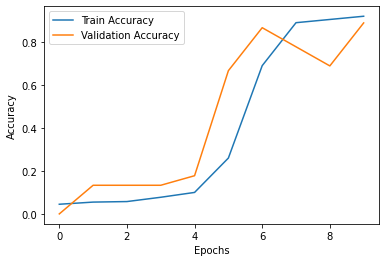

In [29]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [42]:
filename_foto = filename
# filename_foto = "./160x120x3EgoGesture_JPG/SingleOne/BasketballField_Single_One_color_127.jpg"
img_test = cv.cvtColor(cv.resize(cv.imread(filename_foto),(224,224)),cv.COLOR_BGR2RGB)
print  (type(img_test))
im_test = tf.contrib.keras.preprocessing.image.img_to_array(img_test)
im_test = np.expand_dims(im_test, axis=0)

<class 'numpy.ndarray'>


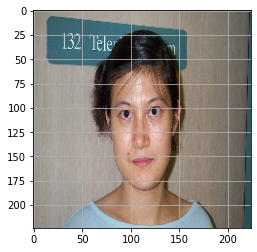

In [43]:
plt.imshow(img_test), plt.grid();

In [0]:
model_A.summary()

In [0]:
red_neural_conv1 = keras.Model(inputs=model_A.input, outputs=model_A.get_layer('block1_conv1').output)

In [0]:
features_conv1 = red_neural_conv1.predict(im_test)

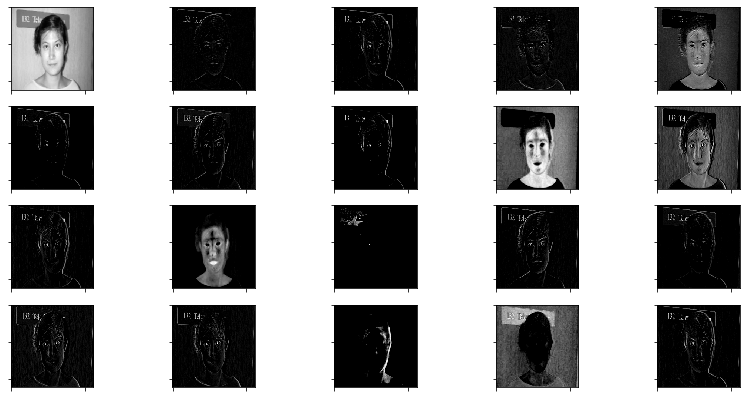

In [48]:
perm = np.random.permutation(range(features_conv1.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv1[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

Con inseption:

In [54]:
history = model_B.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Train on 400 samples, validate on 45 samples
Epoch 1/10
400/400 [==============================] - 4s 11ms/step - loss: 2.8724 - acc: 0.3650 - val_loss: 2.9472 - val_acc: 0.3333
Epoch 2/10
400/400 [==============================] - 4s 11ms/step - loss: 2.8679 - acc: 0.3625 - val_loss: 2.9439 - val_acc: 0.3333
Epoch 3/10
400/400 [==============================] - 4s 11ms/step - loss: 2.8642 - acc: 0.3600 - val_loss: 2.9403 - val_acc: 0.3333
Epoch 4/10
400/400 [==============================] - 4s 11ms/step - loss: 2.8598 - acc: 0.3625 - val_loss: 2.9367 - val_acc: 0.3333
Epoch 5/10
400/400 [==============================] - 4s 11ms/step - loss: 2.8557 - acc: 0.3600 - val_loss: 2.9331 - val_acc: 0.3333
Epoch 6/10
400/400 [==============================] - 4s 11ms/step - loss: 2.8508 - acc: 0.3575 - val_loss: 2.9295 - val_acc: 0.3333
Epoch 7/10
400/400 [==============================] - 4s 11ms/step - loss: 2.8469 - acc: 0.3600 - val_loss: 2.9259 - val_acc: 0.3333
Epoch 8/10
400/400 [====

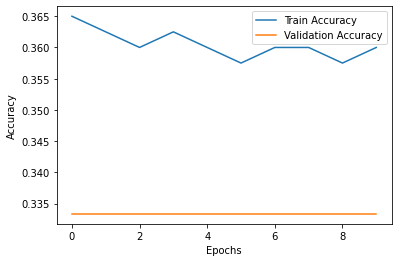

In [55]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [56]:
model_B.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 111, 111, 32) 96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 111, 111, 32) 0           batch_normalization_189[0][0]    
___________________________________________________________________________________________

In [0]:
red_neural_conv1 = keras.Model(inputs=model_B.input, outputs=model_B.get_layer('conv2d_189').output)

In [0]:
features_conv1 = red_neural_conv1.predict(im_test)

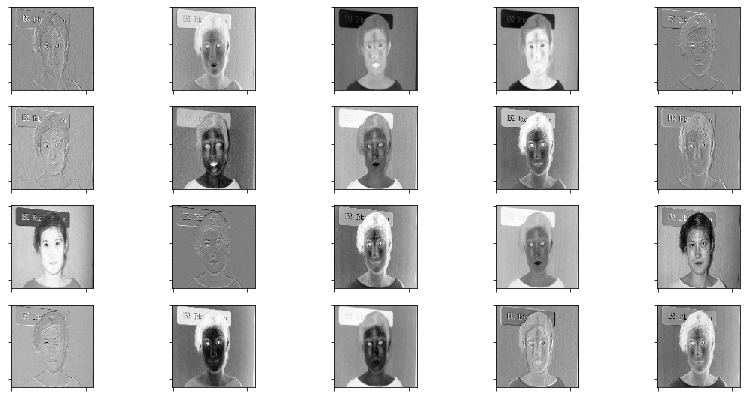

In [59]:
perm = np.random.permutation(range(features_conv1.shape[3]))[0:20]

fig = plt.figure(figsize=(14,7))
for i in range(20):
    ax=fig.add_subplot(4,5,i+1)
    plt.imshow(features_conv1[0,:,:, perm[i]], interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

7. Como funionaron las **deep features** en el problema de reconocimiento de rostros

- Cual fue la mejor capa para configurar el descriptor
- Cual fue el mejor resultado. Porque considera metodolgicamente que se comportó mejor?

**CONCLUSIONES:**

*   Al usar la VGG16 se obtuvieron resultados muy buenos; tuvo un acurracy de 92-88 y por lo visto se tiende a enfocar en lo bordes de las imagenes. Es posible que por esta razon se haya obtenido un gran acurracy.
*   Con inseption se obtuvieron muy bajos resultados, al parecer no se enfoca tanto en lo bordes, si no en separar el fondo de la imagen. A parte cuando realiza los bordes de la imagen tienden a ser muy claros y difusos.
*   Al usar transfer learning se pudo aprovechar redes ya establecidas y se logro adaptar a un dataset diferente.

...


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">